# 1. 이미지를 인식하는 원리
- 학습에 사용될 부분: X_train, y_train
- 테스트에 사용될 부분: X_test, y_test

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [3]:
print('학습셋 이미지 수: %d개' % (X_train.shape[0]))
print('테스트셋 이미지 수: %d개' % (X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


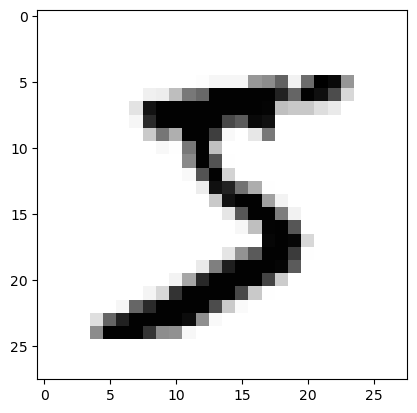

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
import sys

for x in X_train[0]: # 28 X 28 = 784 속성
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
# 1차원 배열로 변경
X_train = X_train.reshape(X_train.shape[0], 784) # 총 샘플의수, 1차원 속성의 개수

In [8]:
# 케라스는 데이터를 0과 1사이의 값으로 변환후 구동할때 좋은 성능을 보인다. 따라서 0 ~ 255 사이의 값을 0 ~ 1 사이의 값으로 변경
# 바꾸는 방법은 각 값을 255로 나누는 것 -> 정규화(normalization)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [9]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [10]:
print('class : %d' % (y_train[0]))

class : 5


In [15]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 전체 실습 코드

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


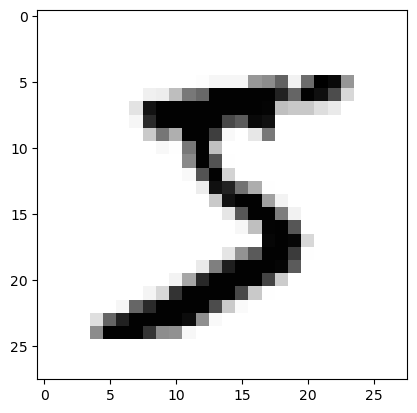

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNist 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인
print('학습셋 이미지 수: %d개' % (X_train.shape[0]))
print('테스트셋 이미지 수: %d개' % (X_test.shape[0]))

# 첫 번째 이미지를 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

# 이미지가 인식되는 원리를 알아보기
for x in X_train[0]: # 28 X 28 = 784 속성
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')
    
# 차원 변환 과정을 실습해 보기
X_train = X_train.reshape(X_train.shape[0], 784) # 총 샘플의수, 1차원 속성의 개수
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인
print('class : %d' % (y_train[0]))

# 바이너리화 과정을 실습
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

# 2. 딥러닝 기본 프레임 만들기

In [20]:
from tensorflow.keras.datasets import mnist

# MNist 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후 테스트셋과 학습셋으로 나누기
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 최적화를 위한 설정 구간
modelpath = 'MNist_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [28]:
# 모델을 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도를 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18714, saving model to MNist_MLP.hdf5


C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18714 to 0.12871, saving model to MNist_MLP.hdf5

Epoch 3: val_loss improved from 0.12871 to 0.10989, saving model to MNist_MLP.hdf5

Epoch 4: val_loss improved from 0.10989 to 0.09700, saving model to MNist_MLP.hdf5

Epoch 5: val_loss improved from 0.09700 to 0.09237, saving model to MNist_MLP.hdf5

Epoch 6: val_loss improved from 0.09237 to 0.08613, saving model to MNist_MLP.hdf5

Epoch 7: val_loss improved from 0.08613 to 0.08533, saving model to MNist_MLP.hdf5

Epoch 8: val_loss improved from 0.08533 to 0.08249, saving model to MNist_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08249

Epoch 10: val_loss improved from 0.08249 to 0.08161, saving model to MNist_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08161

Epoch 12: val_loss improved from 0.08161 to 0.07915, saving model to MNist_MLP.hdf5

Epoch 13: val_loss did not improve from 0.07915

Epoch 14: val_loss did not improve from 0.07915

Epoch 15: val_loss did not improve from 0.0791

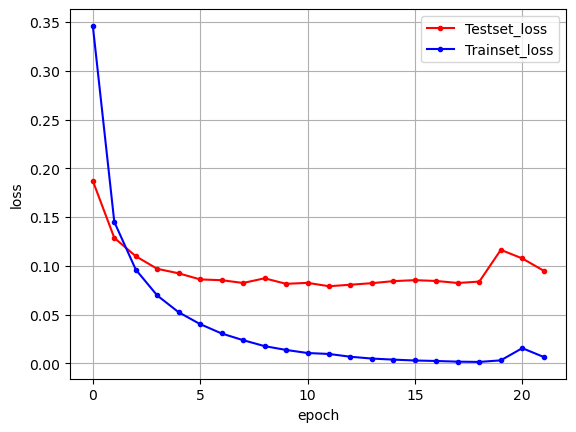

In [30]:
# 학습셋의 오차와 테스트셋의 오차를 그래프
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 전체 코드 실행

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1: val_loss improved from inf to 0.18587, saving model to MNist_MLP.hdf5

Epoch 2: val_loss improved from 0.18587 to 0.13404, saving model to MNist_MLP.hdf5

Epoch 3: val_loss improved from 0.13404 to 0.11316, saving model to MNist_MLP.hdf5

Epoch 4: val_loss improved from 0.11316 to 0.09795, saving model to MNist_MLP.hdf5

Epoch 5: val_loss improved from 0.09795 to 0.09335, saving model to MNist_MLP.hdf

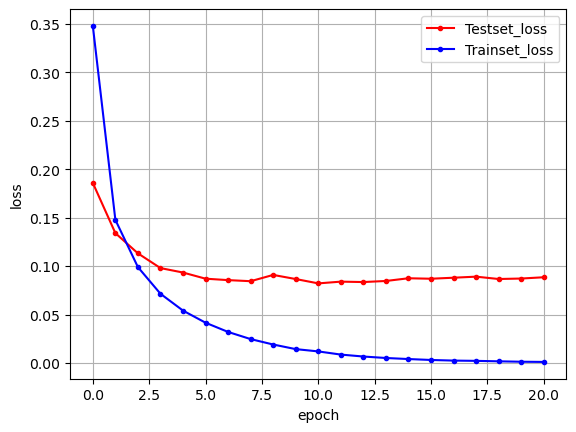

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNist 데이터를 불러온다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후 테스트셋과 학습셋으로 나눈다. 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# 모델 실행 환경을 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간
modelpath = 'MNist_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도를 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 3. 컨볼루션 신경망(CNN)
- 컨볼루션 신경망: 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널을 도입하는 기법

In [37]:
# 케라스에서 컨볼루션 층을 추가하는 함수 Conv2D()입니다
from tensorflow.keras.layers import Conv2D
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
# 커널을 몇개 적용할지, 커널의 크기, 입력되는 값, 활성화 함수

ValueError: Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

In [36]:
model.add(Conv2D(64, (3,3), activation='relu'))

ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

# 4. 맥스 풀링, 드롭아웃, 플래튼
- 컨볼루션 층을 통해 이미지 특징 도출 하지만 그 결과가 아직 여진히 커서 다시 한번 축소
- 맥스 풀링: 정해진 구역 안에서 최댓값을 뽑기
- 평균 풀링: 평균값을 뽑기

In [38]:
model.add(MaxPooling2D(pool_size=(2,2)))

NameError: name 'MaxPooling2D' is not defined

In [39]:
# 드롭아웃: 은닉층에 배치된 노드 중 일부를 임의로 꺼 주는 것
model.add(Dropout(0.25))

NameError: name 'Dropout' is not defined

In [ ]:
# 플래튼: 2차원 -> 1차원 배열로 바꾸어 줌
model.add(Flatten())

# 5. 컨볼루션 신경망 실행하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터를 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간
modelpath = 'MNist_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                   callbacks = [early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


Epoch 1: val_loss improved from inf to 0.07244, saving model to MNist_CNN.hdf5


C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
